In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions.functions import EmissionProfile, AbsoluteMetricsPulseDefaultCO2, AbsoluteMetrics, RelativeMetrics
from climate_models.fair import BackgroundSpeciesQuantities, FaIRClimateModel

## Parameters

In [2]:
studied_species = "Aviation CO2"
start_year = 1765
t0 = 2020
time_horizon = 100
end_year = t0 + time_horizon
unit_value = 1e4 # 10t
# This default vower value allows a smooth profile using FaIR
# Be careful by choosing values lower than 10t, or higher than 1Mt (change in the FaIR results)

In [3]:
if studied_species == "Aviation CO2":
    sensitivity_erf = 0 # Not used
    ratio_erf_rf = 1
elif studied_species == "Aviation contrails":
    sensitivity_erf = 9.36e-13
    ratio_erf_rf = 0.42
elif studied_species == "Aviation NOx ST O3 increase":
    sensitivity_erf = 34.4e-12 / (14/46)
    ratio_erf_rf = 1.37
elif studied_species == "Aviation NOx LT O3 decrease":
    sensitivity_erf = -9.3e-12 / (14/46)
    ratio_erf_rf = 1.18
elif studied_species == "Aviation NOx CH4 decrease":
    sensitivity_erf = -18.7e-12 / (14/46)
    ratio_erf_rf = 1.18
elif studied_species == "Aviation NOx SWV decrease":
    sensitivity_erf = -2.8e-12 / (14/46)
    ratio_erf_rf = 1.18
elif studied_species == "Aviation H2O":
    sensitivity_erf = 0.0052e-12
    ratio_erf_rf = 1
elif studied_species == "Aviation soot":
    sensitivity_erf = 100.7e-12 # Not used
    ratio_erf_rf = 1
elif studied_species == "Aviation sulfur":
    sensitivity_erf = -19.9e-12 # Not used
    ratio_erf_rf = 1

## Metrics calculation

In [4]:
background_species_quantities = BackgroundSpeciesQuantities(start_year, end_year, rcp='RCP45')
emission_profile = EmissionProfile(start_year,t0,time_horizon, 'pulse', unit_value)

In [5]:
radiative_forcing, effective_radiative_forcing, temperature = FaIRClimateModel(start_year, end_year, background_species_quantities, emission_profile, studied_species, sensitivity_erf, ratio_erf_rf)

Running 1 projections in parallel:   0%|          | 0/355 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/355 [00:00<?, ?timesteps/s]

In [6]:
rf_co2, agwp_co2, aegwp_co2, temp_co2, agtp_co2, igtp_co2, atr_co2 = AbsoluteMetricsPulseDefaultCO2(time_horizon, unit_value)
agwp, aegwp, agtp, igtp, atr = AbsoluteMetrics(radiative_forcing, effective_radiative_forcing, temperature, time_horizon)
RelativeMetrics(agwp_co2, aegwp_co2, agtp_co2, igtp_co2, atr_co2, agwp, aegwp, agtp, igtp, atr)

(1.3149363953598996,
 1.3149363953598996,
 1.0256381475800411,
 0.911402901743886,
 0.911402901743886)

## Analysis (for CO2)

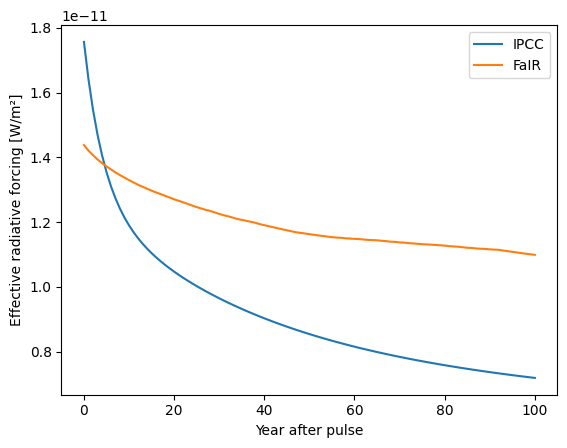

In [7]:
plt.plot(rf_co2, label='IPCC')
plt.plot(effective_radiative_forcing[t0-start_year:end_year], label='FaIR')
plt.xlabel('Year after pulse')
plt.ylabel('Effective radiative forcing [W/m²]')
plt.legend()

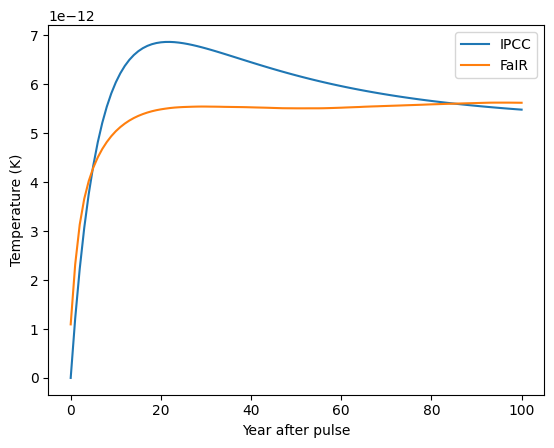

In [8]:
plt.plot(temp_co2, label='IPCC')
plt.plot(temperature[t0-start_year:end_year], label='FaIR')
plt.xlabel('Year after pulse')
plt.ylabel('Temperature (K)')
plt.legend()

In [9]:
# def climate_model(sensitivity_erf, ratio_erf_rf, emissions):
#     effective_radiative_forcing = sensitivity_erf * emissions # W/m2
#     radiative_forcing = effective_radiative_forcing / ratio_erf_rf # W/m2
#     climate_sensitivity = 0.8 # K/(W/m²) for ERF
#     temperature = climate_sensitivity * effective_radiative_forcing
#     return radiative_forcing, effective_radiative_forcing, temperature
# 
# radiative_forcing, effective_radiative_forcing, temperature = climate_model(sensitivity_erf, ratio_erf_rf, emission_profile)
# 
# agwp, aegwp, agtp, igtp, atr = absolute_metrics(radiative_forcing, effective_radiative_forcing, temperature, time_horizon)
# relative_metrics(agwp_co2, aegwp_co2, agtp_co2, igtp_co2, atr_co2, agwp, aegwp, agtp, igtp, atr)